C.2
Questão A: (1 valor) – Explique a metodologia para criar a animação em cada um dos casos
(versões). Comente-as. Justifique.


Caso 1: Figuras animadas com Plotly Express

Várias funções do Plotly Express suportam a criação de figuras animadas através dos argumentos animation_framee animation_group.
Aqui está um exemplo de um gráfico de dispersão animado criado usando o Plotly Express. Observe que você sempre deve corrigir x_rangee y_rangegarantir que seus dados permaneçam visíveis durante toda a animação.

importar  plotly.express  como  px 
df  =  px . dados . gapminder () 
px . dispersão ( df ,  x = "gdpPercap" ,  y = "lifeExp" ,  animation_frame = "ano" ,  animation_group = "country" , 
           tamanho = "pop" ,  color = "continente" ,  hover_name = "country" , 
           log_x = True , size_max = 55 ,  range_x = [ 100 , 100000 ],  range_y = [ 25 , 90 ])


Caso 2: Figuras animadas com objetos de gráfico 

O restante desta seção descreve a API de baixo nível para a construção manual de figuras animadas.

Molduras
Juntamente com data e layout, frames pode ser adicionado como uma chave em um objeto de figura. A frames chave aponta para uma lista de figuras, cada uma das quais será percorrida quando a animação for acionada.

Adicionando botões de controle às animações
Pode adicionar botões de reprodução e pausa para controlar seus gráficos animados, adicionando uma update menusmatriz à layout.  
Os botões são definidos da seguinte maneira:
"updatemenus": [{"type": "buttons",
                 "buttons": [{"label": "Your Label",
                              "method": "animate",
                              "args": [See Below]}]}]

Caso 3: Usando um Slider e Botões
O exemplo a seguir usa o conhecido conjunto de dados Gapminder para exemplificar os recursos de animação. Nesta animação do gráfico de bolhas mostram a mudança do 'PIB per capita' em relação à 'Expectativa de vida' de vários países entre 1952 e 2007, definida por cores e pelos seus respetivos continentes e dimensionada por população.
Este também é um exemplo de construção da estrutura de uma figura como um dicionário Python e, em seguida, a construção de uma figura de objeto gráfico a partir desse dicionário.



Questão B: (1 valor) – Temos “bolhas” de cinco (5) cores diferentes. O que representa cada
cor? Justifique, com descrição detalhada do processo.

Cada cor representa um continente

1.	Asia- Azul 
2.	Africa- Verde
3.	Europa-Vermelho
4.	América-Roxo
5.	Oceânia- Lanranja




In [1]:
#Para analisar e trabalhar os dados, é preciso importar as bibliotecas necessárias
# libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96

In [4]:
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
#data=pd.read_csv('gapminderData.csv')
data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [5]:
#Passo seguinte, agrupar a categoria da coluna Continent num valor numerico para que posso .
data['continent']=pd.Categorical(data['continent'])

In [6]:
#definir valor unico para que nao apareçam anos repetidos,ouseja se um determinado pais tiver um dado repetido num ano, o programa vai apenas ler o 1º
anos=data.year.unique()

<IPython.core.display.Javascript object>


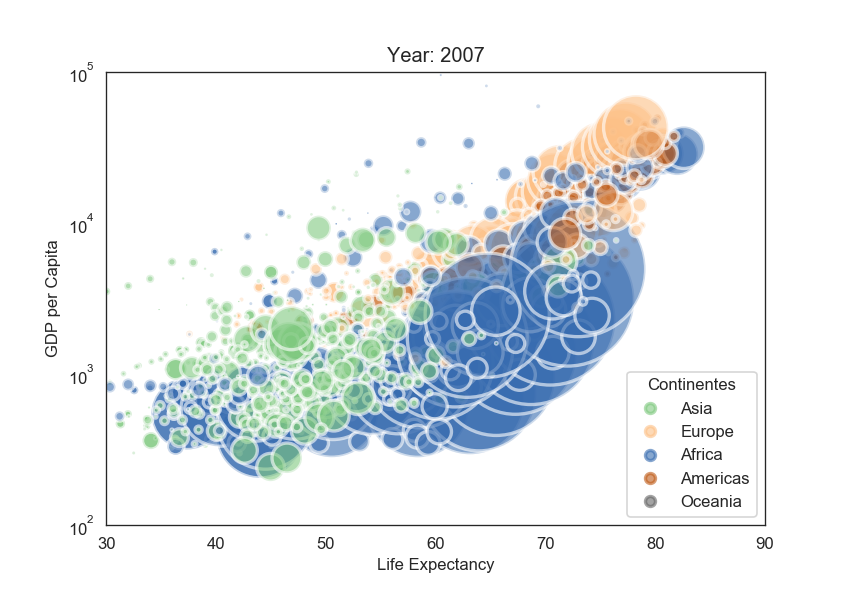

In [7]:

%matplotlib inline
%matplotlib notebook
%matplotlib notebook
c = data.continent.unique()

# Inicio do mapa...dando as medidas com se quer apresentar, formatando a escala, etiquetas e limites dos titulos e dos eixos.
#fig=plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
fig, ax = plt.subplots(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)

# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.ylim(100,100000)
plt.xlim(30, 90)


#Depois foi defina a animação: Criado o titulo do grafico, cujo ano vai mudando à medida que os dados são lidos, usando +str(anos)[i], 
#É atribuida as cores conforme os grupos e definida a palete de cores (c=tmp['continent'].cat.codes, cmap="Accent"), a transparencia (alpha=0.6) w a linha limite das bolhas (edgecolors="white") 
def animate(i):
    plt.title("Year: "+str(anos[i]) )
    tmp=data[ data.year == anos[i] ]
    scut=plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    Continentes= ax.legend(handles =scut.legend_elements () [0], labels = data["continent"].unique(), loc=4, title= "Continentes")               
    #scut=ax.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    
    Continentes= ax.legend(handles =scut.legend_elements () [0], labels = c, loc=4, title= "Continentes")

   
ani = animation.FuncAnimation(fig, animate, frames=len(anos), interval=200, blit=False, repeat=False)
    
plt.show()